In [18]:
import os
from pathlib import Path
import pandas as pd
import yaml
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
def load_yaml(yaml_file_name):
    with open(yaml_file_name) as fp:
        config = yaml.safe_load(fp)
    return config

In [26]:
yaml_inputs = load_yaml("settings.yml")

In [31]:
req_list = yaml_inputs['train_req_cols']

In [49]:
ingested_list  = ['age', 'job_type', 'flnwgt', 'education', 'experience',
       'marital_status', 'job_position', 'relationship', 'race', 'gender',
       'location']

In [50]:
req_list

['age',
 'job_type',
 'flnwgt',
 'education',
 'experience',
 'marital_status',
 'job_position',
 'relationship',
 'race',
 'gender',
 'location',
 'salary']

In [60]:
text_response, indicator = column_validation(req_list, df , 'my uploaded df')
text_response, indicator

Validated my uploaded df


('Validated my uploaded df', 0)

1

In [59]:
def column_validation(req_list, df, df_name):
    ingested_list = df.columns
    not_list = []
    for col in req_list:
        if col not in ingested_list:
            not_list.append(col)
    if len(not_list)!=0:
        print(f"Missing columns in the data frame: {df_name}. Here is the list of missing columns:{not_list}")
        x = f"Missing columns in the data frame: {df_name}. Here is the list of missing columns:{not_list}"
        i = 1
        return x,i
    else:
        print(f"Validated {df_name}")
        x= f"Validated {df_name}"
        i = 0
        return x,i

In [61]:
df

,age,job_type,flnwgt,education,experience,marital_status,job_position,relationship,race,gender,location,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [ ]:
Overview:

1) Data Ingestion

2) Data Validation

3) Data Transformation - Pandas as required for ML Algorithm

4) Saving the output data in required format and in required location

In [20]:
def load_yaml(yaml_file_name):
    with open(yaml_file_name) as fp:
        config = yaml.safe_load(fp)
    return config

In [21]:
yaml_inputs = load_yaml("settings.yml")

In [22]:
yaml_inputs

{'datapath': 'data', 'train_filepath': None}

In [13]:
# pip install pandas

'C:\\Users\\AZEEM_SIDD\\PycharmProjects\\ML_Pipeline_Deploy'

In [9]:
parent_dir = Path.cwd()
data_path = parent_dir.joinpath('data')
filename = 'adult-training.csv'
parent_dir, data_path

(WindowsPath('C:/Users/AZEEM_SIDD/PycharmProjects/ML_Pipeline_Deploy'),
 WindowsPath('C:/Users/AZEEM_SIDD/PycharmProjects/ML_Pipeline_Deploy/data'))

In [23]:
df.columns

Index(['age', 'job_type', 'flnwgt', 'education', 'experience',
       'marital_status', 'job_position', 'relationship', 'race', 'gender',
       'location', 'salary'],
      dtype='object')

In [85]:
df = pd.read_csv(data_path.joinpath(filename))
df.head(4)

,age,job_type,flnwgt,education,experience,marital_status,job_position,relationship,race,gender,location,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K


In [ ]:
# Data Transformation 

In [63]:
def identify_numerical_columns(dataframe):
    """
    Identify numerical columns in a pandas DataFrame.
    
    Parameters:
        dataframe (pd.DataFrame): The input DataFrame.
        
    Returns:
        list: List of column names containing numerical data.
    """
    numerical_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    return numerical_columns

def identify_categorical_columns(dataframe):
    """
    Identify categorical columns in a pandas DataFrame.
    
    Parameters:
        dataframe (pd.DataFrame): The input DataFrame.
        
    Returns:
        list: List of column names containing categorical data.
    """
    categorical_columns = dataframe.select_dtypes(include=['object', 'category']).columns.tolist()
    return categorical_columns

In [71]:
identify_categorical_columns(df)

['job_type',
 'education',
 'marital_status',
 'job_position',
 'relationship',
 'race',
 'gender',
 'location',
 'salary']

In [70]:
identify_numerical_columns(new_df)

['age', 'experience']

In [86]:
new_df = df.drop('flnwgt', axis=1)
new_df.head()

,age,job_type,education,experience,marital_status,job_position,relationship,race,gender,location,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [91]:
one_type = new_df['salary'].value_counts().keys()[1]

In [90]:
new_df['target'] = new_df['salary'].apply(lambda x:1 if x==one_type else 0)
new_df

,age,job_type,education,experience,marital_status,job_position,relationship,race,gender,location,salary,target
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K,0


In [93]:
ml_cols = ['age', 'experience', 'job_type', 'education', 'marital_status', 'job_position', 'relationship','race','gender','location' , 'target']
num_cols = ['age', 'experience']
cat_cols = ['job_type', 'education', 'marital_status', 'job_position', 'relationship','race','gender','location']
target = 'target'

In [94]:
ml_df = new_df[ml_cols].copy()

In [95]:
ml_df

,age,experience,job_type,education,marital_status,job_position,relationship,race,gender,location,target
0,39,13,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,0
1,50,13,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,0
2,38,9,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,0
3,53,7,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,0
4,28,13,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,0
32557,40,9,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,1
32558,58,9,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,0
32559,22,9,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,0


In [96]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(ml_df.drop('target', axis=1), 
                                                    ml_df['target'],
                                                    random_state=42,
                                                    stratify= ml_df['target'],
                                                    shuffle=True,
                                                    test_size=0.25)

                                                    

In [107]:
# Numerical Variables Pipeline

In [116]:
# pip install feature-engine

In [ ]:
['age', 'experience']

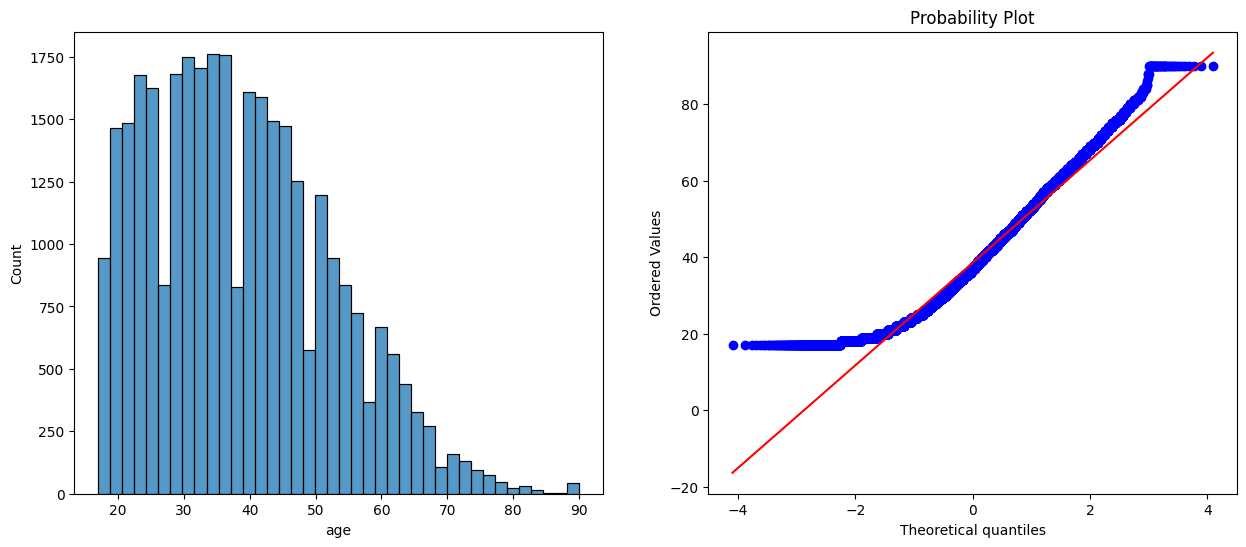

In [113]:
assess_normality(ml_df, 'age')

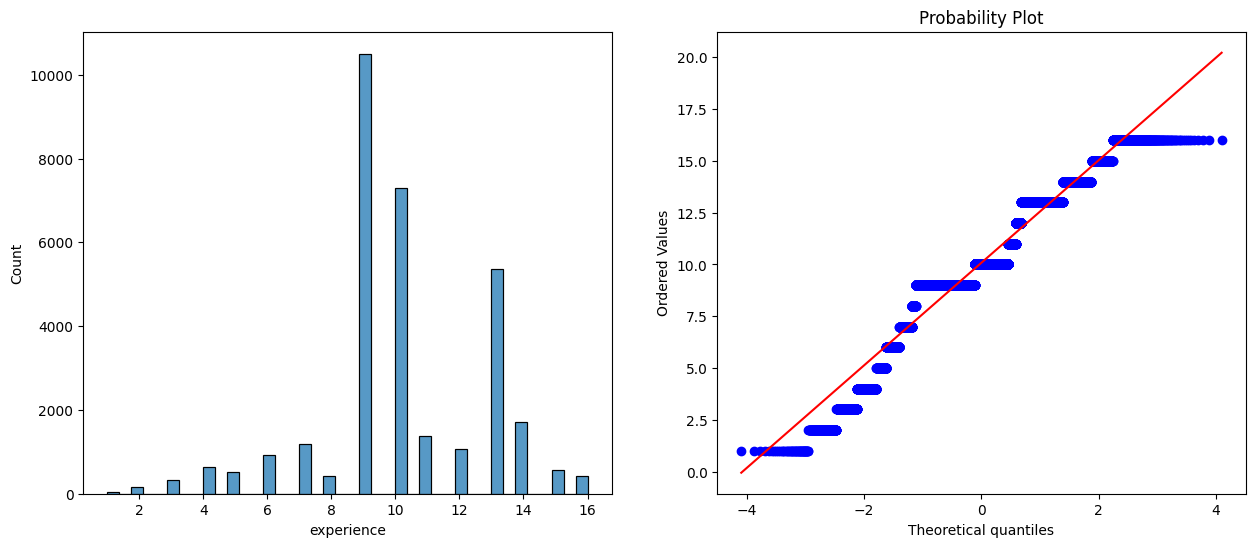

In [114]:
assess_normality(ml_df, 'experience')

In [120]:
from feature_engine.transformation import LogTransformer, YeoJohnsonTransformer

In [125]:
lt = YeoJohnsonTransformer(variables=['age'])
X_train_num1 = lt.fit_transform(X_train)
X_test_num1 = lt.transform(X_test)

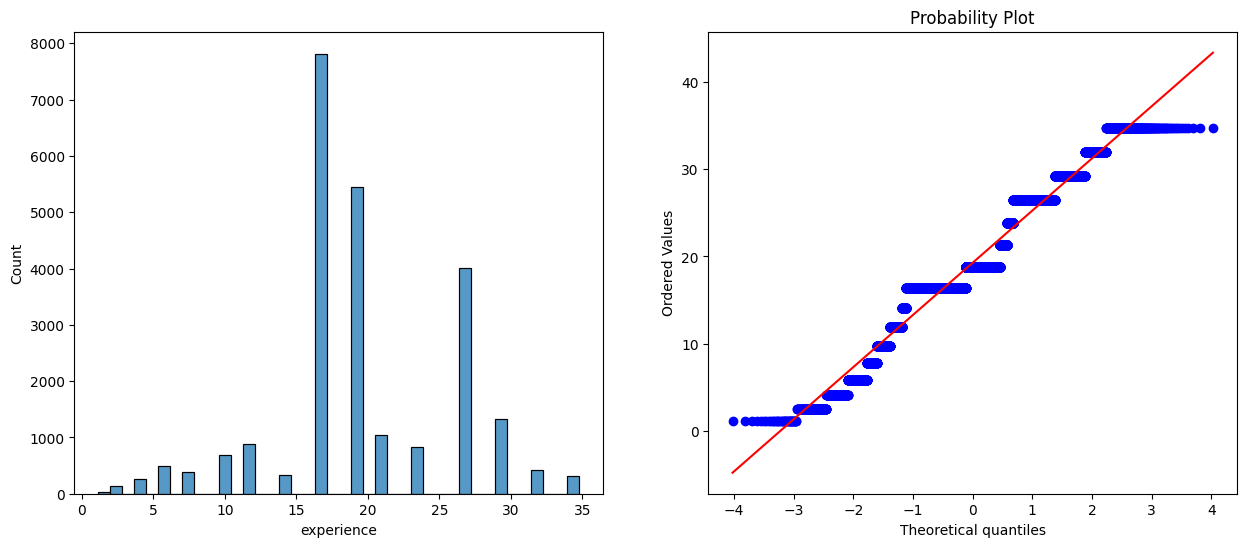

In [124]:
assess_normality(X_train_num1, 'experience')

In [111]:
def assess_normality(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    sns.histplot(df[variable], bins=40)
    plt.subplot(1,2,2)
    stats.probplot(df[variable], dist='norm', plot=plt)
    plt.show()
    

In [108]:
X_train['age']

19359    28
15003    35
12490    24
32292    41
5163     27
         ..
31450    55
20560    39
23650    55
25301    26
5800     19
Name: age, Length: 24420, dtype: int64

In [106]:
pip install catboost

You should consider upgrading via the 'c:\users\azeem_sidd\pycharmprojects\ml_pipeline_deploy\venv\scripts\python.exe -m pip install --upgrade pip' command.



  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)


In [105]:
# Features Importance



In [104]:
y_test.value_counts()

target
0    6181
1    1960
Name: count, dtype: int64